In [ ]:
import pandas as pd
import numpy as np

In [ ]:
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches (1).csv')

In [ ]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


**I extract the total runs from the dataset**

In [ ]:
total_score_df = deliveries.groupby(['match_id' , 'inning']).sum()['total_runs'].reset_index()

**extract data only first inning**

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


merging total_runs in matches dataset

In [ ]:
match_df = matches.merge(total_score_df[['match_id' , 'total_runs']] , left_on = 'id' , right_on='match_id')

In [ ]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

creating a list of cricket teams where behalf of now

In [ ]:
teams = [
    'Royal Challengers Bangalore' ,
    'Punjab Kings' ,
    'Mumbai Indians' ,
    'Kolkata Knight Riders' ,
    'Rajasthan Royals' ,
    'Chennai Super Kings' ,
    'Sunrisers Hyderabad' ,
    'Delhi Capitals' ,
    'Lucknow Super Giants' ,
    'Gujarat Titans'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils' , 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils' , 'Delhi Capitals')


match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')


match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions' , 'Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions' , 'Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bengaluru' , 'Royal Challengers Bangalore')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bengaluru' , 'Royal Challengers Bangalore')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab' , 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab' , 'Punjab Kings')


filtering only team which is exist

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(1006, 22)

extract only those matches where D/L IS NOT APPLYIED

In [ ]:
match_df['method'].fillna(0 , inplace=True)

/tmp/ipython-input-1942852791.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  match_df['method'].fillna(0 , inplace=True)


In [ ]:
match_df = match_df[match_df['method'] == 0]

In [ ]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,0,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,0,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,0,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,0,BF Bowden,K Hariharan,335986,110


extracting columns match_id , city , winner , total_runs and merging on deliveries dataset

In [ ]:
match_df = match_df[['match_id' , 'city' , 'winner' , 'total_runs']]

In [ ]:
delivery_df = match_df.merge(deliveries , on='match_id' )

extracting only 2nd inning from the data..because we do work on chasing

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df.shape

(114648, 20)

now i want to do ...i want after ball what is total run
means target runs left after ball


In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237123,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
237124,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
237125,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
237126,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

now we will substaract total_runs_x - current_score it give a value how much target runs left

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237123,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
237124,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
237125,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
237126,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237123,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,110,3
237124,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,111,2
237125,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,112,1
237126,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,113,0


now i want to make column how much ball remaining after ball

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237123,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,110,3
237124,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,111,2
237125,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,112,1
237126,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,113,0


In [ ]:
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

i want ..next feature is after ball how much wickets are remaining

In [ ]:
delivery_df['dismissal_kind'].value_counts()

,count
dismissal_kind,
caught,3540
bowled,1001
run out,419
lbw,372
caught and bowled,166
stumped,165
hit wicket,8
retired hurt,6
obstructing the field,2


In [ ]:
# Step 1: Clean player_dismissed column
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == "0" else 1).astype(int)

# Step 2: Cumulative wickets lost in each match
delivery_df['wickets_lost'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Step 3: Wickets remaining (start at 10, go down to 0, never negative)
delivery_df['wickets'] = (10 - delivery_df['wickets_lost']).clip(lower=0)


create current_run_rate feature

In [ ]:
#  crr = runs / overs

delivery_df['crr'] = delivery_df['current_score']*6 / (120 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6) / delivery_df['balls_left']

i create a function where winner and batting_team

In [ ]:
def result(row) :
  return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result , axis=1)

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_lost,wickets,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,NaN,1,221,119,0,10,6.000000,11.142857,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,NaN,NaN,2,220,118,0,10,6.000000,11.186441,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,NaN,2,220,117,0,10,4.000000,11.282051,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,NaN,3,219,116,0,10,4.500000,11.327586,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,NaN,4,218,115,0,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237123,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,NaN,NaN,110,3,61,2,8,11.186441,0.295082,1
237124,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,NaN,NaN,111,2,60,2,8,11.100000,0.200000,1
237125,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,NaN,NaN,112,1,59,2,8,11.016393,0.101695,1
237126,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,NaN,NaN,113,0,58,2,8,10.935484,0.000000,1


Extracting columns

In [ ]:
final_df = delivery_df[['batting_team' , 'bowling_team' , 'city' , 'runs_left' , 'balls_left' , 'wickets' ,'total_runs_x','crr' ,'rrr', 'result' ]]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
49326,Royal Challengers Bangalore,Kings XI Punjab,Dharamsala,232,114,10,232,0.0,12.210526,0


ML_MODEL

In [ ]:
final_df = final_df[final_df['balls_left'] != 0 ]

In [ ]:
x = final_df.iloc[: , :-1]
y = final_df.iloc[: , -1]
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [ ]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]

x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf' , OneHotEncoder(sparse_output=False , drop='first') , ['batting_team' , 'bowling_team' , 'city'])
] , remainder='passthrough')

pipeline :-

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [ ]:
pipe2 = Pipeline(steps=[
    ('step1' , trf) ,
    ('step2' , LogisticRegression(solver='liblinear'))
])

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
pipe2.fit(x_train , y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe2.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8097808535178778

In [ ]:
pipe2.predict_proba(x_test)[800]

array([0.9549815, 0.0450185])

In [ ]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
134063,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,172,116,10,175,4.500000,8.896552,1
97255,Rajasthan Royals,Chennai Super Kings,Ahmedabad,130,98,10,156,7.090909,7.959184,1
109808,Sunrisers Hyderabad,Gujarat Lions,Rajkot,33,52,10,135,9.000000,3.807692,1
204981,Delhi Capitals,Rajasthan Royals,Guwahati,112,53,7,199,7.791045,12.679245,0
5686,Rajasthan Royals,Chennai Super Kings,Jaipur,2,39,8,109,7.925926,0.307692,1
...,...,...,...,...,...,...,...,...,...,...
4956,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,104,44,5,178,5.842105,14.181818,0
221689,Gujarat Titans,Chennai Super Kings,Chennai,150,73,7,206,7.148936,12.328767,0
83530,Chennai Super Kings,Sunrisers Hyderabad,NaN,18,24,6,145,7.937500,4.500000,1
117394,Sunrisers Hyderabad,Gujarat Lions,Delhi,156,114,10,162,6.000000,8.210526,1


In [ ]:
def match_pregression(x_df , match_id , pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team' , 'bowling_team' , 'city' , 'runs_left' , 'balls_left' , 'wickets' , 'total_runs_x' , 'crr' , 'rrr' , 'result' ]]
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100 , 1)
    temp_df['win'] = np.round(result.T[1]*100 , 1)
    temp_df['end_of_over'] = range(1 , temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0 , target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0 , 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0 : temp_df.shape[0]]

    print("Target-" , target)
    temp_df = temp_df[['end_of_over' , 'runs_after_over' , 'wickets_in_over' , 'lose' , 'win']]
    return temp_df , target


In [ ]:
temp_df , target = match_pregression(delivery_df ,392236  , pipe)
temp_df

Target- 170


,end_of_over,runs_after_over,wickets_in_over,lose,win
25439,1,4,0,72.0,28.0
25445,2,8,0,67.0,33.0
25451,3,4,0,69.0,31.0
25457,4,7,0,66.4,33.6
25463,5,22,0,39.6,60.4
25470,6,19,0,21.5,78.5
25477,7,5,1,34.4,65.6
25483,8,5,0,35.2,64.8
25489,9,3,0,38.8,61.2
25496,10,7,0,36.5,63.5


Text(0.5, 1.0, 'Target-170')

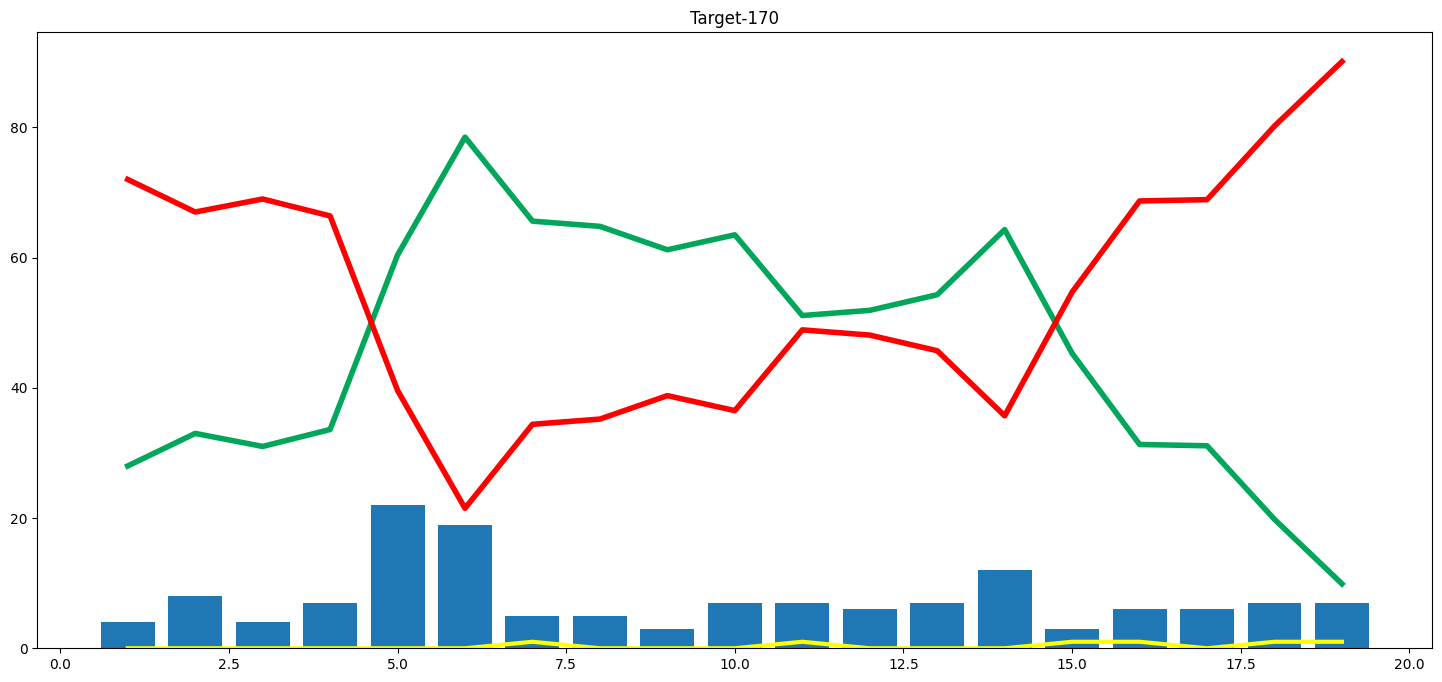

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'] , temp_df['wickets_in_over'] , color = 'yellow' , linewidth=3)
plt.plot(temp_df['end_of_over'] , temp_df['win'] , color = '#00a65a' , linewidth=4)
plt.plot(temp_df['end_of_over'] , temp_df['lose'] , color='red' , linewidth=4)
plt.bar(temp_df['end_of_over'] ,temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
delivery_df.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_lost,wickets,crr,rrr,result
130962,1136575,Jaipur,Kolkata Knight Riders,160,2,Kolkata Knight Riders,Rajasthan Royals,11,5,RV Uthappa,...,NaN,NaN,96,64,49,2,8,8.112676,7.836735,1


In [ ]:
teams

['Royal Challengers Bangalore',
 'Punjab Kings',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [ ]:
import pickle
pickle.dump(pipe2 , open('pipe3.pkl' , 'wb'))

In [ ]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)